In [1]:
# This model is essentially a "hello world" type thing. I am using the Book in TinyML (by Warden et al)
# To explore how to deploy Machine Learning models to tiny machines (Arduino Nano Sense in my case).
# I think this is gonna be pretty sweet!

# -Kieran

In [149]:
# Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
print(tf.__version__)

2.3.0


In [144]:
samples = 10000

# Generate a uniformly distributed set of random numbers in the range from # 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=samples)

In [145]:
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

In [146]:
# Calculate the corresponding  values
y_values = np.sin(x_values)*np.cos(x_values)

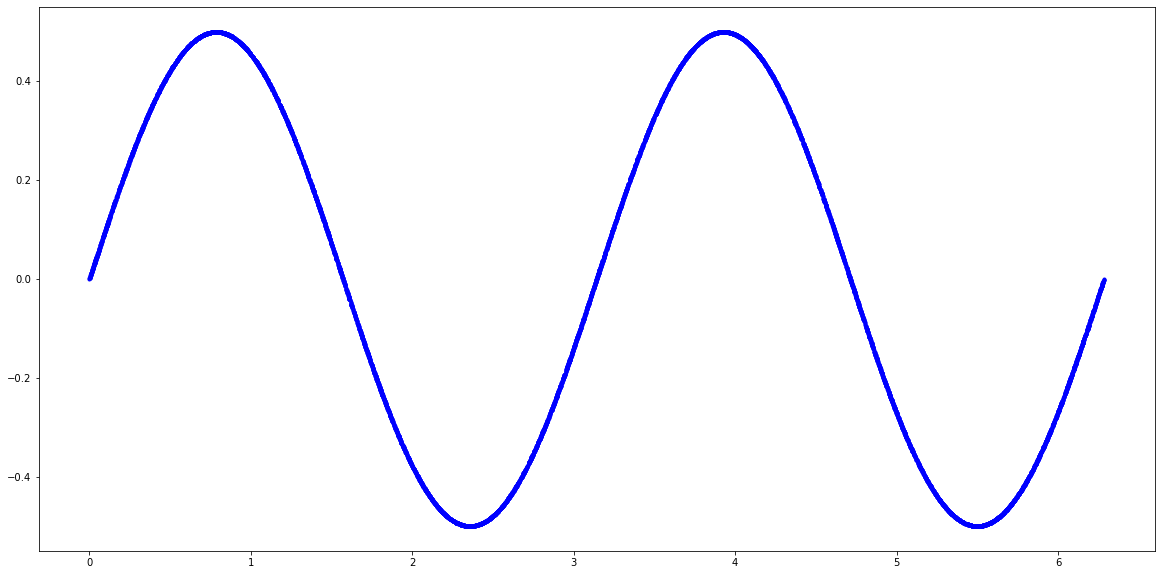

In [147]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [101]:
 # Add some noise
y_values += 0.2 * np.random.randn(*y_values.shape)

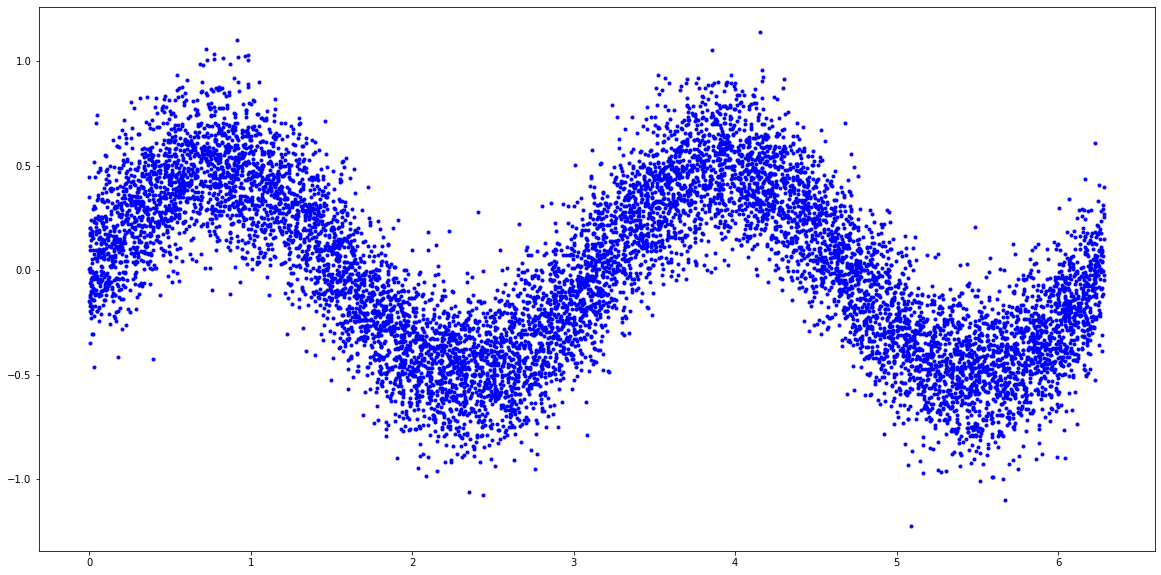

In [115]:
# Plot 
plt.figure(figsize=(20,10))
plt.plot(x_values, y_values, 'b.') 
plt.show()

In [116]:

# 60% of our data for training and 20% for testing. 20% # will be used for validation.
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)
 
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split]) 
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

In [117]:
x_train.shape

(6000,)

In [118]:
x_validate.shape

(2000,)

In [106]:
x_test.shape

(2000,)

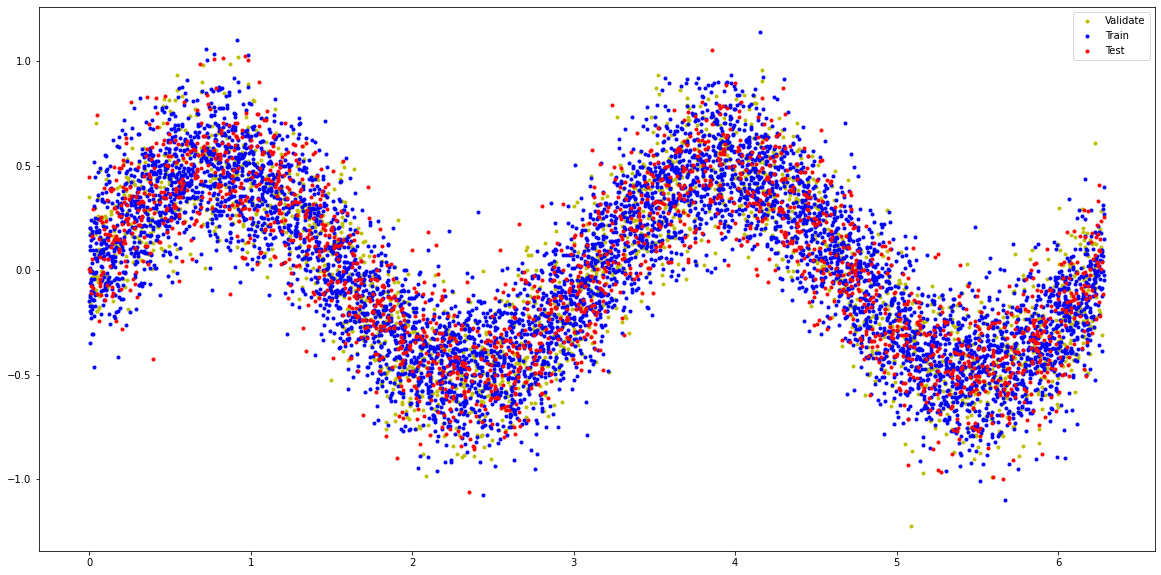

In [120]:
plt.figure(figsize=(20,10))
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test") 
plt.legend()
plt.show()


In [121]:
# Making model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae']) 
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Fitting model

history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size = 8, validation_data=(x_validate, y_validate))

Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1482 - mae: 0.3218 - val_loss: 0.1530 - val_mae: 0.3212
Epoch 2/100
750/750 [==============================] - 1s 905us/step - loss: 0.1449 - mae: 0.3161 - val_loss: 0.1501 - val_mae: 0.3196
Epoch 3/100
750/750 [==============================] - 1s 887us/step - loss: 0.1446 - mae: 0.3153 - val_loss: 0.1497 - val_mae: 0.3192
Epoch 4/100
750/750 [==============================] - 1s 888us/step - loss: 0.1448 - mae: 0.3159 - val_loss: 0.1500 - val_mae: 0.3194
Epoch 5/100
750/750 [==============================] - 1s 893us/step - loss: 0.1442 - mae: 0.3150 - val_loss: 0.1499 - val_mae: 0.3186
Epoch 6/100
750/750 [==============================] - 1s 894us/step - loss: 0.1445 - mae: 0.3152 - val_loss: 0.1498 - val_mae: 0.3188
Epoch 7/100
750/750 [==============================] - 1s 894us/step - loss: 0.1445 - mae: 0.3152 - val_loss: 0.1503 - val_mae: 0.3198
Epoch 8/100
750/750 [==============================] - 1s

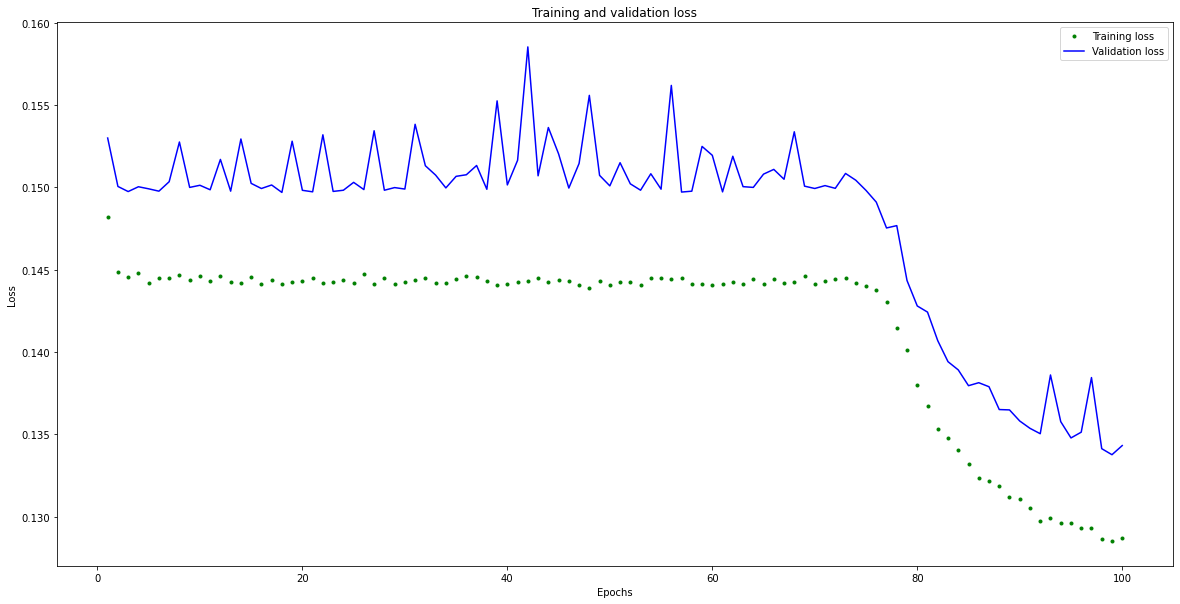

In [123]:
# Observing losses - model 1

loss = history_1.history['loss'] 
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

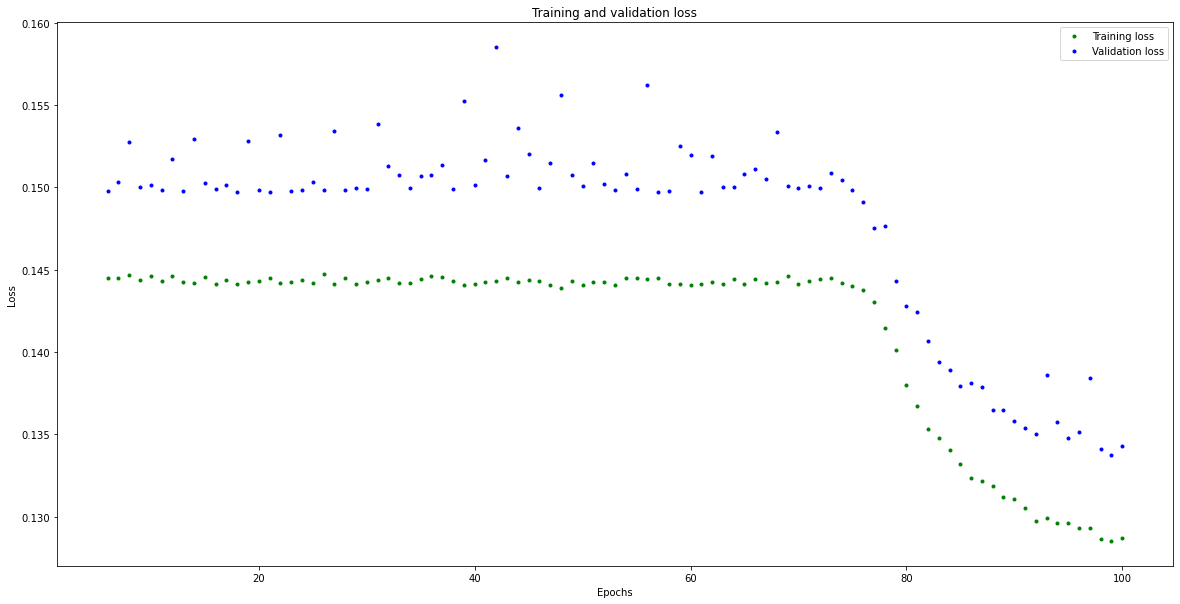

In [124]:
 # Excluding the first few epochs 
SKIP = 5
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

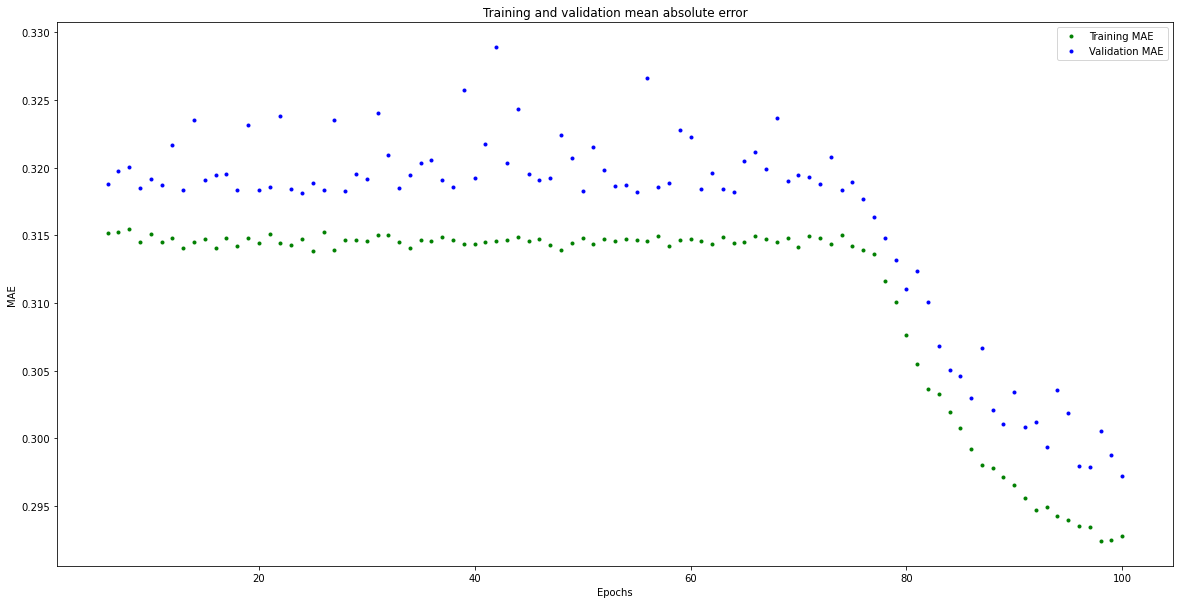

In [125]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

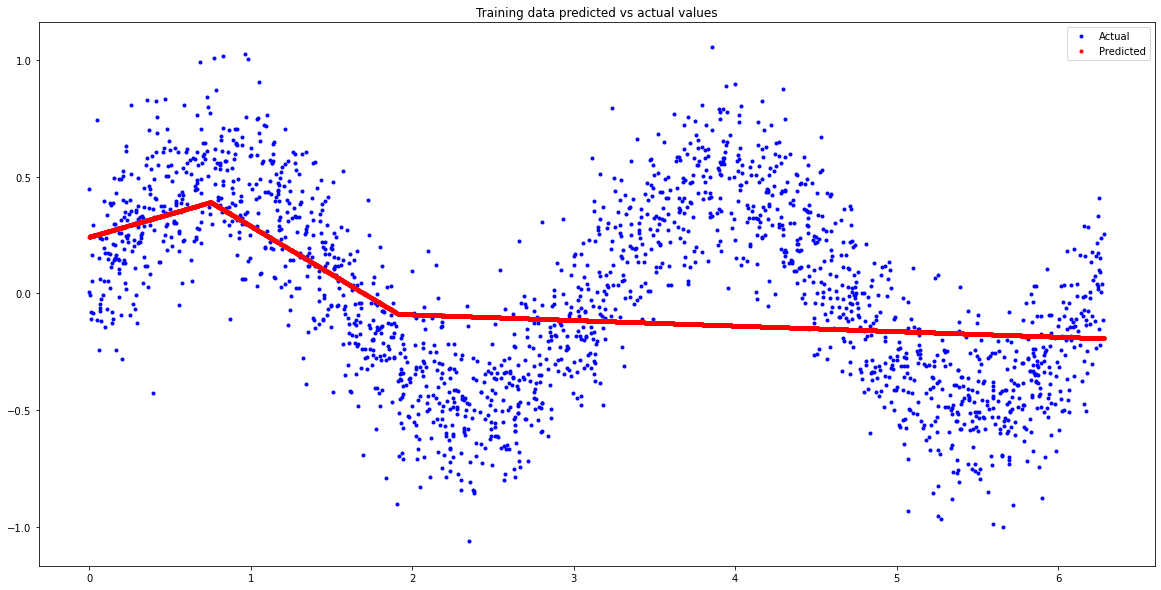

In [126]:
# Making and plotting predicitions

predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [127]:
# Imporving model -> model 2

model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(1,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [128]:
history_2 = model_2.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 1s 1ms/step - loss: 0.1464 - mae: 0.3181 - val_loss: 0.1455 - val_mae: 0.3147
Epoch 2/500
375/375 [==============================] - 0s 963us/step - loss: 0.1392 - mae: 0.3074 - val_loss: 0.1394 - val_mae: 0.3045
Epoch 3/500
375/375 [==============================] - 0s 960us/step - loss: 0.1327 - mae: 0.2983 - val_loss: 0.1342 - val_mae: 0.2984
Epoch 4/500
375/375 [==============================] - 0s 956us/step - loss: 0.1294 - mae: 0.2921 - val_loss: 0.1330 - val_mae: 0.2987
Epoch 5/500
375/375 [==============================] - 0s 958us/step - loss: 0.1267 - mae: 0.2869 - val_loss: 0.1294 - val_mae: 0.2919
Epoch 6/500
375/375 [==============================] - 0s 976us/step - loss: 0.1235 - mae: 0.2819 - val_loss: 0.1297 - val_mae: 0.2868
Epoch 7/500
375/375 [==============================] - 0s 978us/step - loss: 0.1183 - mae: 0.2756 - val_loss: 0.1181 - val_mae: 0.2754
Epoch 8/500
375/375 [==============================] - 0s

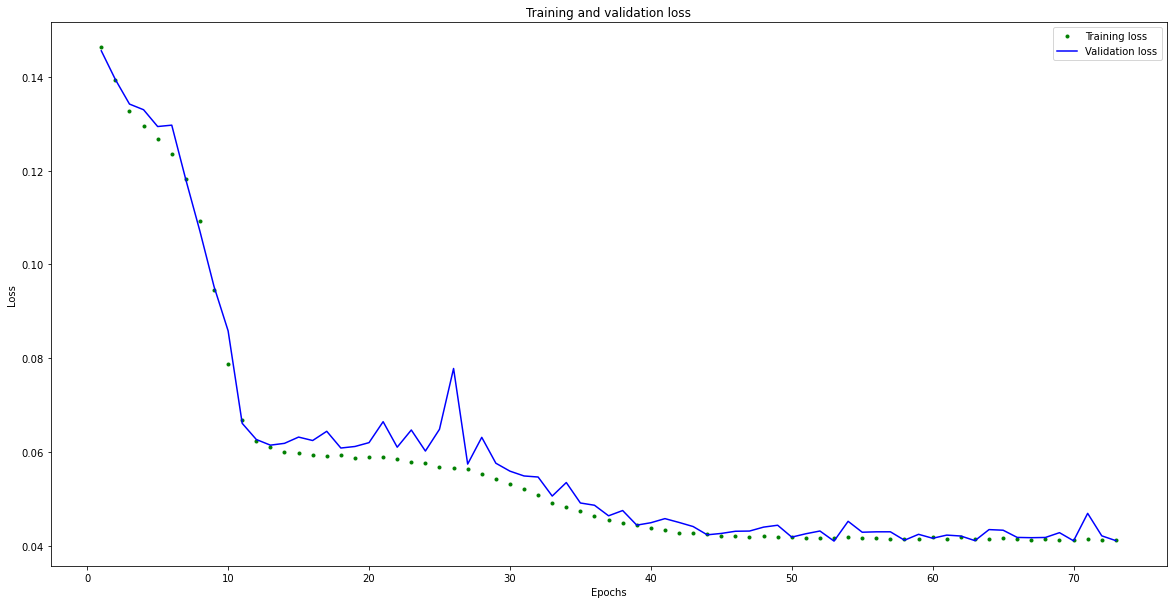

In [129]:
# Observing losses - model 2

loss = history_2.history['loss'] 
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

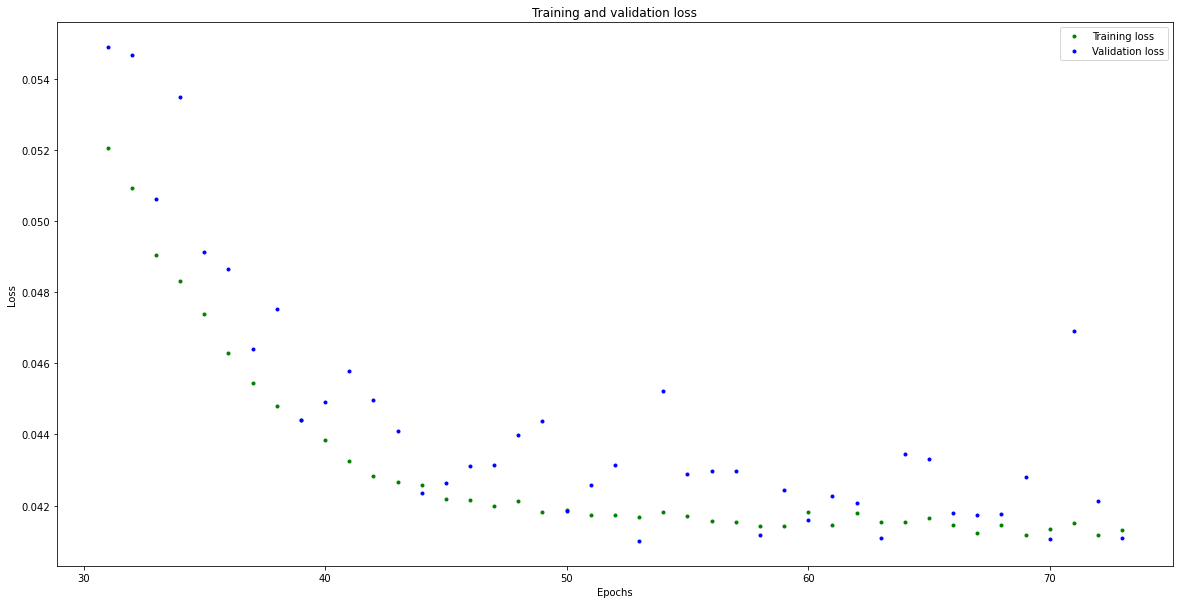

In [130]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

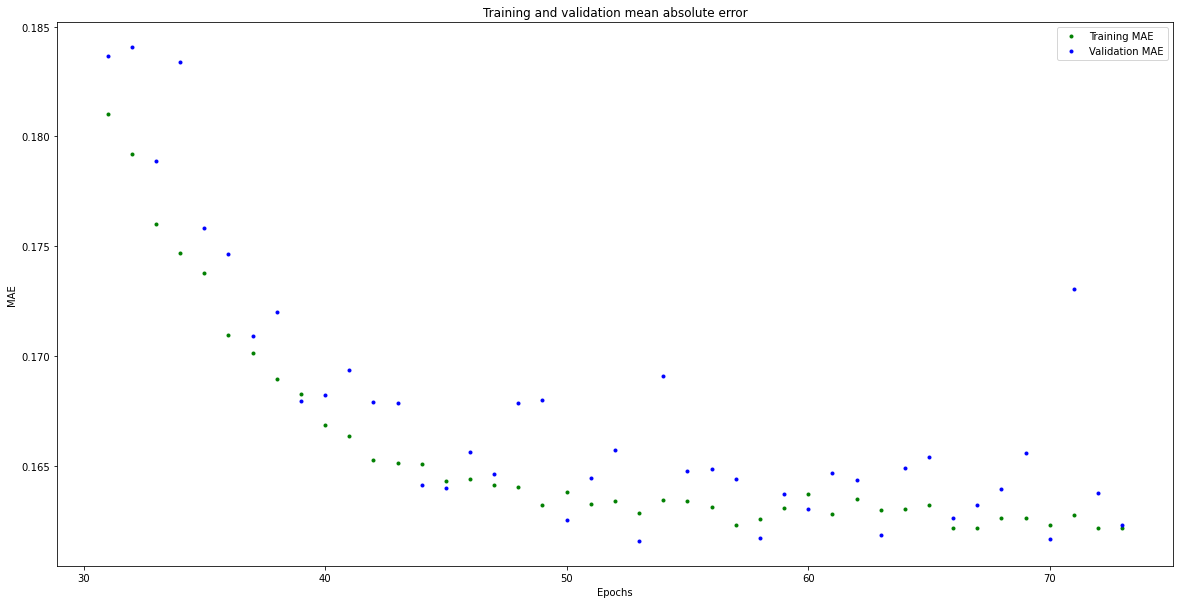

In [131]:
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

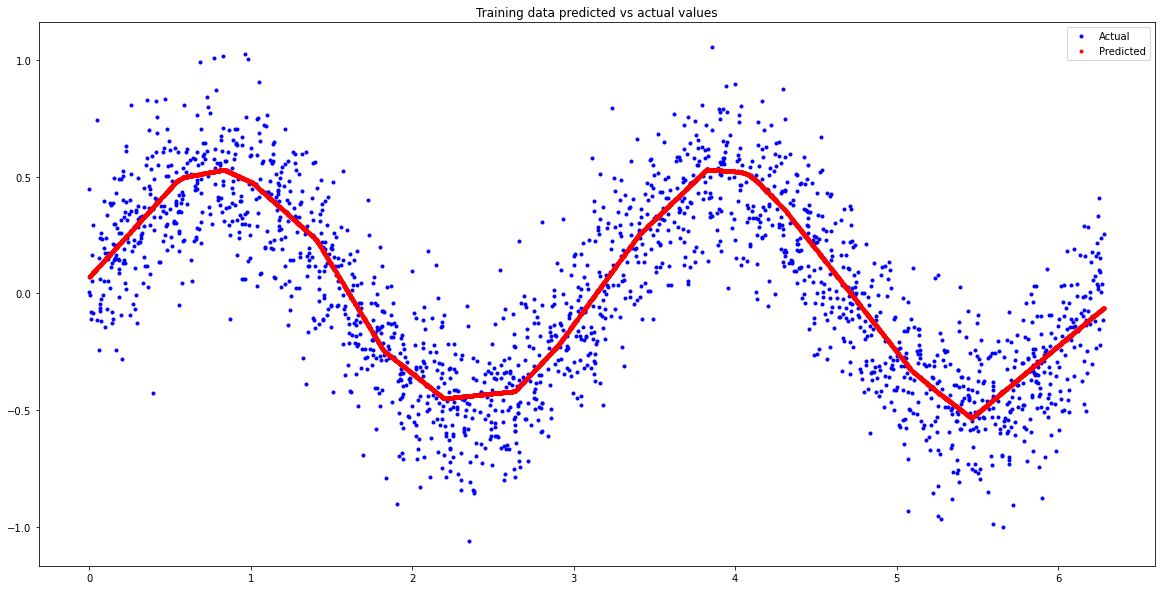

In [132]:
# Making and plotting predicitions

predictions = model_2.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [133]:
# Imporving model -> model 3

model_3 = tf.keras.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

earlystop_callback = EarlyStopping(monitor='val_mae', patience=20, mode = 'min') # Adding early stopping
model_3.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Show a summary of the model
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [134]:
history_3 = model_3.fit(x_train, y_train, 
                        epochs=500, batch_size=16, 
                        validation_data=(x_validate, y_validate),
                        callbacks=[earlystop_callback])

Epoch 1/500
375/375 [==============================] - 1s 1ms/step - loss: 0.1465 - mae: 0.3141 - val_loss: 0.1384 - val_mae: 0.2960
Epoch 2/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1116 - mae: 0.2673 - val_loss: 0.0958 - val_mae: 0.2479
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0734 - mae: 0.2150 - val_loss: 0.0719 - val_mae: 0.2180
Epoch 4/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0589 - mae: 0.1926 - val_loss: 0.0552 - val_mae: 0.1862
Epoch 5/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0557 - mae: 0.1862 - val_loss: 0.0631 - val_mae: 0.1972
Epoch 6/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0530 - mae: 0.1830 - val_loss: 0.0521 - val_mae: 0.1792
Epoch 7/500
375/375 [==============================] - 0s 1ms/step - loss: 0.0526 - mae: 0.1834 - val_loss: 0.0566 - val_mae: 0.1889
Epoch 8/500
375/375 [==============================] - 0s 1ms/step - 

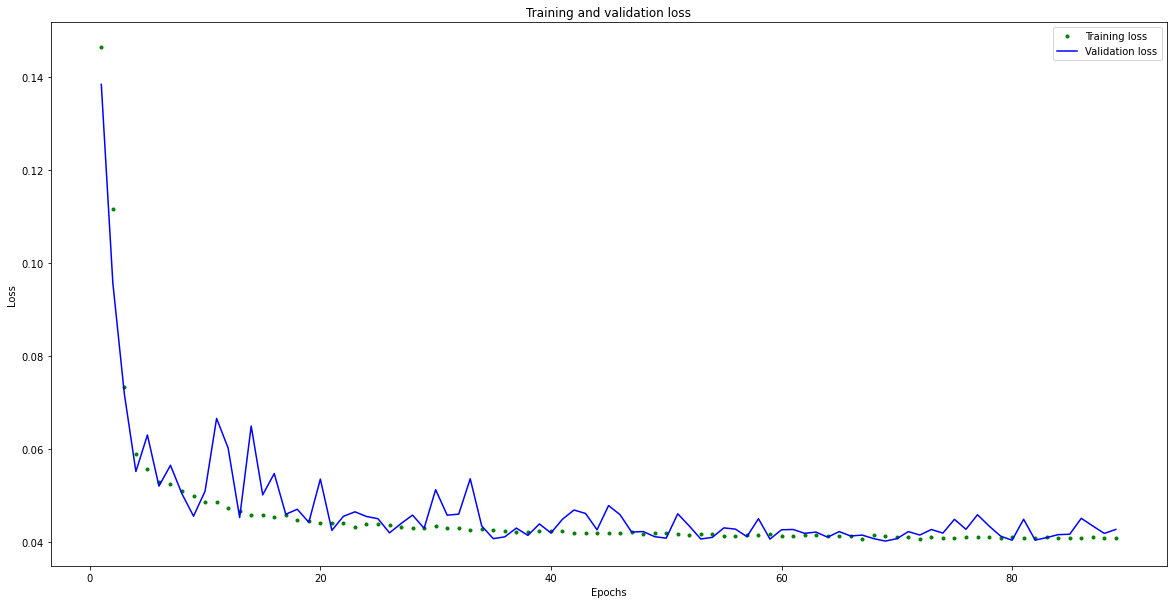

In [135]:
# Observing losses - model 3

loss = history_3.history['loss'] 
val_loss = history_3.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

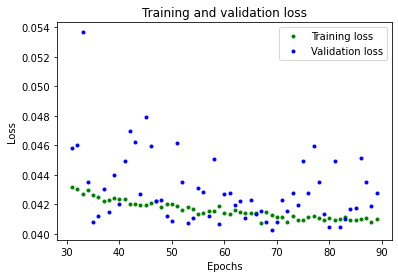

In [136]:
 # Excluding the first few epochs 
SKIP = 30
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

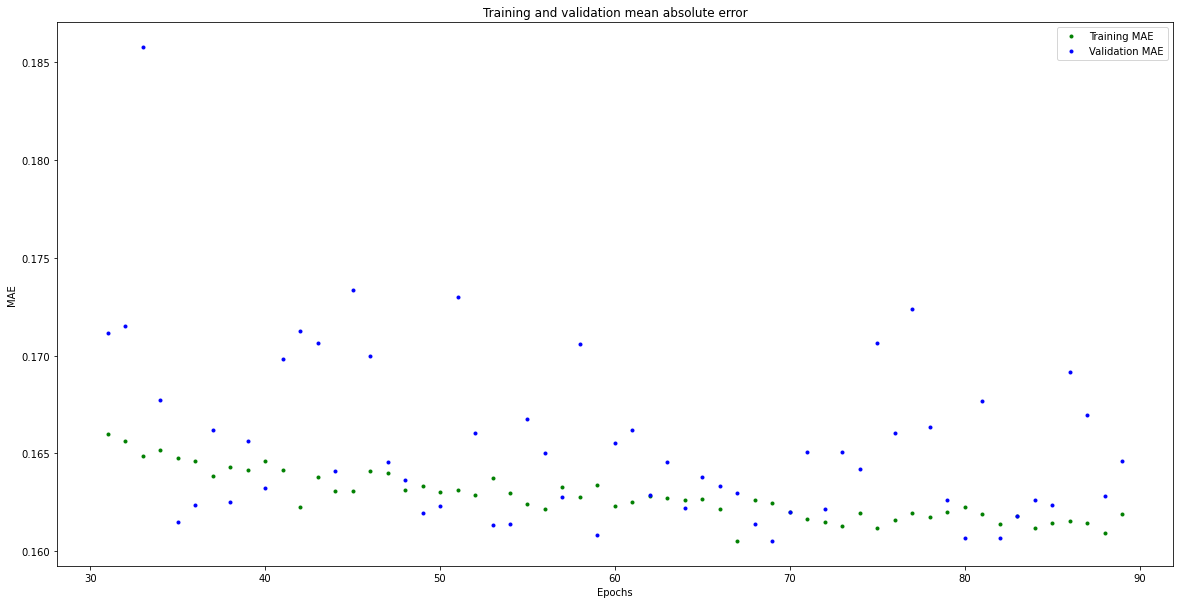

In [137]:
mae = history_3.history['mae']
val_mae = history_3.history['val_mae']
plt.figure(figsize=(20,10))
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE') 
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error') 
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

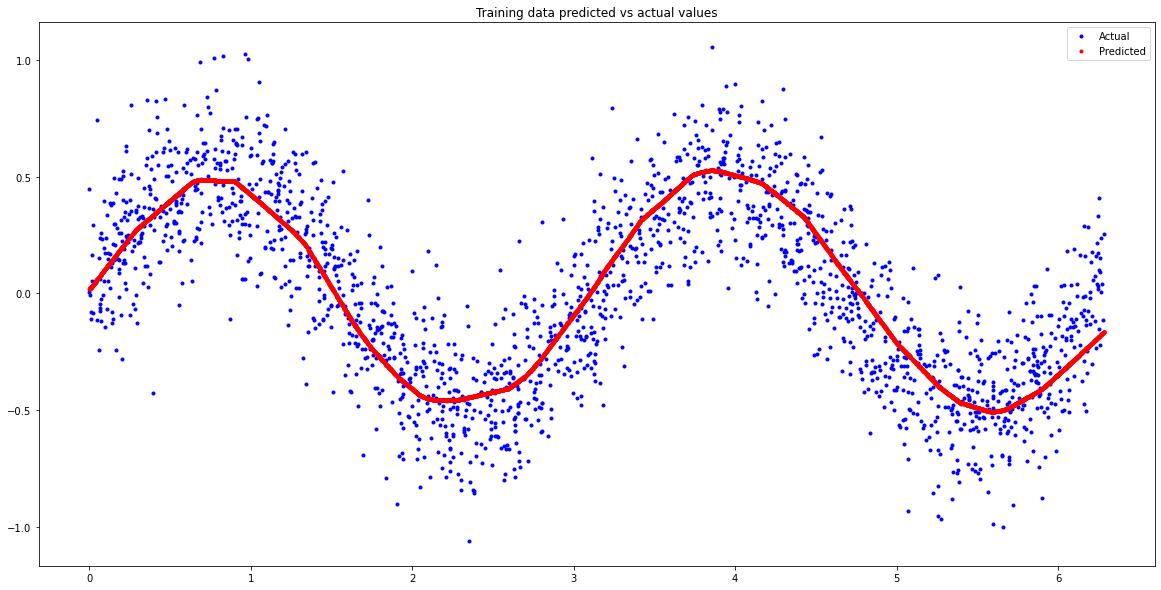

In [142]:
# Making and plotting predicitions

predictions = model_3.predict(x_train)
# Plot the predictions along with the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values') 
plt.plot(x_test, y_test, 'b.', label='Actual') 
plt.plot(x_train, predictions, 'r.', label='Predicted') 
plt.legend()
plt.show()

In [151]:
# Model has been imporved substantially!

In [159]:
# NOW CONVERTING TO TENSORFLOW LITE!!!

# Converting the model to the TensorFlow Lite format with quantization - 
# Quantization allows for weights and biases to go from 32bit floats to 8bit integers
# Makes it much faster to run!

converter = tf.lite.TFLiteConverter.from_keras_model(model_3) 

In [160]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/kt/yq7c5nfx74379_pvqgbzr7v00000gn/T/tmpo6ckcucx/assets


INFO:tensorflow:Assets written to: /var/folders/kt/yq7c5nfx74379_pvqgbzr7v00000gn/T/tmpo6ckcucx/assets


AttributeError: module 'six' has no attribute 'ensure_str'